<a href="https://colab.research.google.com/github/VihaanS22/API-/blob/main/Data_Story.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import statistics


In [ ]:
from google.colab import files
media = files.upload()

df = pd.read_csv("savings.csv")
fig = px.scatter(df, y = "quant_saved", color = "rem_any", title = "Money Saved")
fig.show()


Saving savings.csv to savings (1).csv


We thus infer a lot of people have saved without recieving a reminder(blue dots).


In [ ]:
import csv

with open("savings.csv", newline = "") as file:
  reader = csv.reader(file)
  data = list(reader)

data.pop(0)

total_entries = len(data)
reminders = 0

for i in data:
  if(int(i[3]) == 1):
    reminders += 1

print("Total number of people reminded", reminders)
print("Total number of people not reminded", total_entries - reminders)



Total number of people reminded 8293
Total number of people not reminded 5267


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(x = ["reminded", "not reminded"], y = [reminders, total_entries - reminders]))
fig.show()

Here we see the number of people reminded and not reminded while saving as both text and graph


In [ ]:
savings_data = []

for i in data:
  savings_data.append(float(i[0]))

print(f"Mean of Savings is {statistics.mean(savings_data)}")
print(f"Median of Savings is {statistics.median(savings_data)}")
print(f"Mode of Savings is {statistics.mode(savings_data)}")


Mean of Savings is 85.32780331328739
Median of Savings is 39.2724
Mode of Savings is 0.0


In [ ]:
reminded_savings = []
not_reminded = []

for i in data:
  if(int(i[3]) == 1):
    reminded_savings.append(float(i[0]))

  else:
    not_reminded.append(float(i[0]))

print("These are the results of people who were reminded to save : ")
print(f"Mean of Savings is {statistics.mean(reminded_savings)}")
print(f"Median of Savings is {statistics.median(reminded_savings)}")
print(f"Mode of Savings is {statistics.mode(reminded_savings)}")

print("These are the results of people who were not reminded to save : ")
print(f"Mean of Savings is {statistics.mean(not_reminded)}")
print(f"Median of Savings is {statistics.median(not_reminded)}")
print(f"Mode of Savings is {statistics.mode(not_reminded)}")


These are the results of people who were reminded to save : 
Mean of Savings is 82.56940908263547
Median of Savings is 39.2724
Mode of Savings is 0.0
These are the results of people who were not reminded to save : 
Mean of Savings is 89.67095185226523
Median of Savings is 36.0475
Mode of Savings is 0.0


In [ ]:
print(f"Stdev of All Savings is {statistics.stdev(savings_data)}")
print(f"Stdev of People who were reminded is {statistics.stdev(reminded_savings)}")
print(f"Stdev of People who were not reminded is {statistics.stdev(not_reminded)}")


Stdev of All Savings is 196.75453011909315
Stdev of People who were reminded is 173.24866414440817
Stdev of People who were not reminded is 228.875050299707


In [ ]:
import numpy as np

age = []
savings = []

for i in data:
  if(float(i[5]) != 0):
    age.append(float(i[5]))
    savings.append(float(i[0]))

correlation = np.corrcoef(age, savings)

print("Correlation is ", correlation[0, 1])


Correlation is  0.03663447975985462


Basically not much correlation between age and savings of a person.


In [ ]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df['quant_saved']], ['Savings'], show_hist = False)
fig.show()



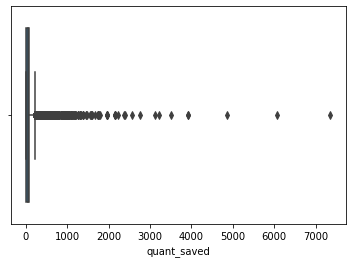

In [ ]:
import seaborn as sb

sb.boxplot(data = df, x = df['quant_saved'])

In [ ]:
q1 = df['quant_saved'].quantile(0.25)
q3 = df['quant_saved'].quantile(0.75)

iqr = q3-q1

print("iqr : ", iqr)
print("q1 : ", q1)
print("q3 : ", q3)

lower_whisker = q1-1.5*iqr
higher_whisker = q3+1.5*iqr

print("Lower whisker", lower_whisker)
print("Upper whisker", higher_whisker)

whisk_df = df[df['quant_saved'] < higher_whisker]


iqr :  84.22999999999999
q1 :  2.2840000000000003
q3 :  86.514
Lower whisker -124.06099999999998
Upper whisker 212.85899999999998


In [ ]:
all_savings = whisk_df['quant_saved'].tolist()

print(f"Mean of Savings is {statistics.mean(all_savings)}")
print(f"Median of Savings is {statistics.median(all_savings)}")
print(f"Mode of Savings is {statistics.mode(all_savings)}")
print(f"Mean of Savings is {statistics.stdev(all_savings)}")


fig = ff.create_distplot([all_savings], ['Savings'], show_hist = False)
fig.show()

Mean of Savings is 46.200519389818794
Median of Savings is 36.0475
Mode of Savings is 0.0
Mean of Stdev is 50.866871917288634


In [ ]:
import random

sampling_means = []

for i in range(1000):
  temp_list = []

  for j in range(100):
    temp_list.append(random.choice(all_savings))

  sampling_means.append(statistics.mean(temp_list))

head_mean = statistics.mean(sampling_means)

fig = ff.create_distplot([sampling_means], ['Sample of Savings'], show_hist = False)
fig.add_trace(go.Scatter(x = [head_mean, head_mean], y = [0, 0.1], mode = "lines", name = "Mean of all Samples"))

fig.show()

In [ ]:
print("stdev of sampling data", statistics.stdev(sampling_means))

stdev of sampling data 4.922414132237941


In [ ]:
temp_df = whisk_df[whisk_df.age != 0]
age = temp_df['age'].tolist()
savings = temp_df['quant_saved'].tolist()



correlation = np.corrcoef(age, savings)

print("Correlation is ", correlation[0, 1])

Correlation is  0.08561544120342093


In [ ]:
reminded_df = whisk_df.loc[whisk_df['rem_any'] == 1]
not_reminded_df = whisk_df.loc[whisk_df['rem_any'] == 0]

fig = ff.create_distplot([not_reminded_df['quant_saved'].tolist()], ['Savings of not reminded'], show_hist = False)

fig.show()

In [ ]:
nr = []
nrs = not_reminded_df['quant_saved'].tolist()


for i in range(1000):
  temp_list = []

  for j in range(100):
    temp_list.append(random.choice(nrs))

  nr.append(statistics.mean(temp_list))

head_mean = statistics.mean(nr)

fig = ff.create_distplot([nr], ['Sample of NR savings'], show_hist = False)
fig.add_trace(go.Scatter(x = [head_mean, head_mean], y = [0, 0.1], mode = "lines", name = "Mean of all Samples"))

fig.show()

nrstdev = statistics.stdev(nr)
print("stdev of sampling data", nrstdev)

stdev of sampling data 4.965854040625026


In [ ]:
first_start, first_end = head_mean - nrstdev, head_mean + nrstdev
sec_start, sec_end = head_mean - 2*nrstdev, head_mean + 2*nrstdev
three_start, three_end = head_mean - 3*nrstdev, head_mean + 3*nrstdev

In [ ]:
rsampling_means = []
rs = reminded_df['quant_saved'].tolist()

for i in range(1000):
  temp_list = []

  for j in range(100):
    temp_list.append(random.choice(rs))

  rsampling_means.append(statistics.mean(temp_list))

rhead_mean = statistics.mean(rsampling_means)

fig = ff.create_distplot([rsampling_means], ['Sample of Savings'], show_hist = False)
fig.add_trace(go.Scatter(x = [rhead_mean, rhead_mean], y = [0, 0.1], mode = "lines", name = "Mean of all Samples"))

rstdev = statistics.stdev(rsampling_means)
print("stdev of sampling data", rstdev)

fig.show()

stdev of sampling data 5.1050135050639005


In [ ]:
zscore = (rhead_mean - head_mean)/nrstdev
print("The z_score is ", zscore)

The z_score is  0.7341430560212111
